In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import os
%matplotlib inline

def show_graph(graph, size=None, node_labels=None, planar=False, path=[], name=None, save=False):
    G = nx.Graph()
    if node_labels:
        for i, el in enumerate(node_labels):
            if i in path:
                path[path.index(i)] = el
            G.add_node(el)
    for i in range(len(graph)):
        for j in range(len(graph[0])):
            if j > i and graph[i][j] > 0:
                if node_labels:
                    G.add_edge(node_labels[i], node_labels[j], weight=graph[i][j])
                else:
                    G.add_edge(i, j, weight=graph[i][j])
    if planar:
        pos = nx.circular_layout(G)
    else:
        pos=nx.spring_layout(G)
    _, ax = plt.subplots(1, 1, figsize=size)
    path_edges = list(zip(path,path[1:]))

    # Draw nodes and edges not included in path
    nx.draw_networkx_nodes(G, pos, nodelist=set(G.nodes)-set(path), ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=set(G.edges)-set(path_edges), ax=ax)

    # Draw nodes and edges included in path
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='r', ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', ax=ax)

    # Draw labels
    nx.draw_networkx_labels(G, pos, ax=ax)
    # nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G,'weight'), ax=ax)

    # Save to file
    if save:
        if not os.path.exists(os.getcwd() + "/saves"):
            os.makedirs(os.getcwd() + "/saves")
        if name:
            pass
        else:
            name = "graph.png"
        plt.savefig(f"saves/{name}.png", format="PNG")

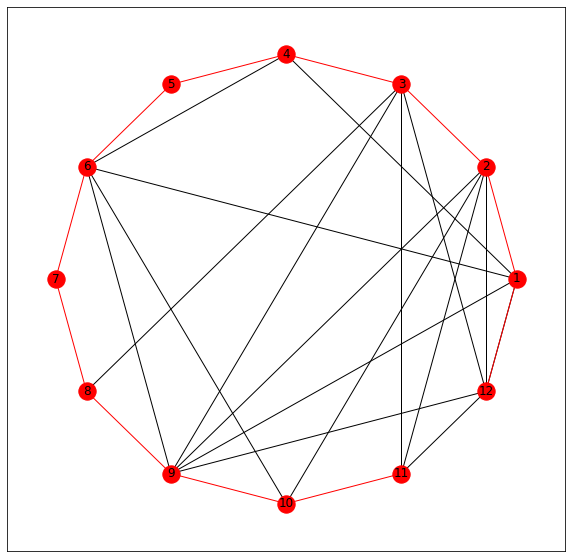

In [11]:
G = [[int(el) for el in row.split()] for row in """
0	1	0	1	0	1	0	0	1	0	0	1
1	0	1	0	0	0	0	0	1	1	1	1
0	1	0	1	0	0	0	1	1	0	1	1
1	0	1	0	1	1	0	0	0	0	0	0
0	0	0	1	0	1	0	0	0	0	0	0
1	0	0	1	1	0	1	0	1	1	0	0
0	0	0	0	0	1	0	1	0	0	0	0
0	0	1	0	0	0	1	0	1	0	0	0
1	1	1	0	0	1	0	1	0	1	0	1
0	1	0	0	0	1	0	0	1	0	1	0
0	1	1	0	0	0	0	0	0	1	0	1
1	1	1	0	0	0	0	0	1	0	1	0
""".strip().split('\n')]

show_graph(G, size=(10, 10), planar=True, save=True, name="planar", node_labels=list(range(1, 13)), path=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])